You are given an integer array `heights` representing the heights of buildings, some `bricks`, and some `ladders`.

You start your journey from building `0` and move to the next building by possibly using bricks or ladders.

While moving from building `i` to building `i+1` **(0-indexed)**,
- If the current building's height is **greater than or equal** to the next building's height, you do not need a ladder or bricks.
- If the current building's height is **less than** the next building's height, you can either use **one ladder** or `(h[i+1] - h[i])` **bricks**.

Return *the furthest building index (0-indexed) you can reach if you use the given ladders and bricks optimally*.

<br>

**Example 1:**

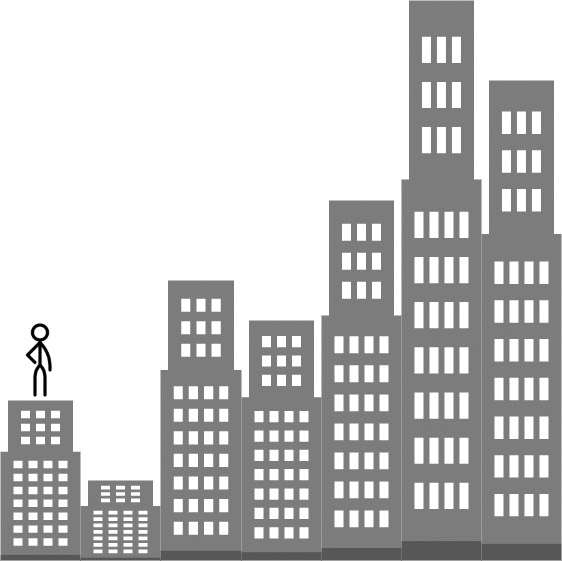

>**Input:** heights = [4,2,7,6,9,14,12], bricks = 5, ladders = 1<br>
>**Output:** 4<br>
>**Explanation:** Starting at building 0, you can follow these steps:<br>
>\- Go to building 1 without using ladders nor bricks since 4 >= 2.<br>
>\- Go to building 2 using 5 bricks. You must use either bricks or ladders because 2 < 7.<br>
>\- Go to building 3 without using ladders nor bricks since 7 >= 6.<br>
>\- Go to building 4 using your only ladder. You must use either bricks or ladders because 6 < 9.<br>
>It is impossible to go beyond building 4 because you do not have any more bricks or ladders.<br>


**Example 2:**
>**Input:** heights = [4,12,2,7,3,18,20,3,19], bricks = 10, ladders = 2<br>
>**Output:** 7


**Example 3:**
>**Input:** heights = [14,3,19,3], bricks = 17, ladders = 0<br>
>**Output:** 3

<br>

**Constraints:**
- >1 <= heights.length <= 10<sup>5</sup>
- >1 <= heights[i] <= 10<sup>6</sup>
- >0 <= bricks <= 10<sup>9</sup>
- >0 <= ladders <= heights.length

In [1]:
class Solution:
    def furthestBuilding(self, heights: list[int], bricks: int, ladders: int) -> int:
        import heapq
        
        heap = []
        for i in range(len(heights) - 1):
            diff = heights[i + 1] - heights[i]

            if diff > 0:
                heapq.heappush(heap, diff)
                
                if len(heap) > ladders:
                    bricks -= heapq.heappop(heap)
                    
                    if bricks < 0:
                        return i
        
        return len(heights) - 1